# 와인 품질 분류

## 와인 성분 데이터
- train.csv / test.csv
- index : 구분자
- quality : 품질
- fixed acidity 산도
- volatile acidity 휘발성산
- citric acid 시트르산
- residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
- chloarides 염화물
- free sulfur dioxide 독립 이산화황
- total sulfur dioxide 총 이산화황
- density 밀도
- pH 수소이온농도
- sulphates 황산염
- alcohol 도수
- type 종류

주어진 데이터를 바탕으로 와인 품질 분류

In [1]:
! pip install matplotlib

     -------------------------------------- 158.4/158.4 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 7.6/7.6 MB 6.0 MB/s eta 0:00:00
   ---------------------------------------- 181.9/181.9 kB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 2.2/2.2 MB 6.3 MB/s eta 0:00:00
   ---------------------------------------- 56.2/56.2 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 53.0/53.0 kB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 2.6/2.6 MB 6.6 MB/s eta 0:00:00
   ---------------------------------------- 103.1/103.1 kB 2.9 MB/s eta 0:00:00


In [2]:
! pip install seaborn

   ---------------------------------------- 294.6/294.6 kB 3.6 MB/s eta 0:00:00


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
  


In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [4]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [9]:
# index 컬럼 삭제
train = train.drop(columns = 'index')
test = test.drop(columns = 'index')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  type                  1000 non-null   object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB


<AxesSubplot:>

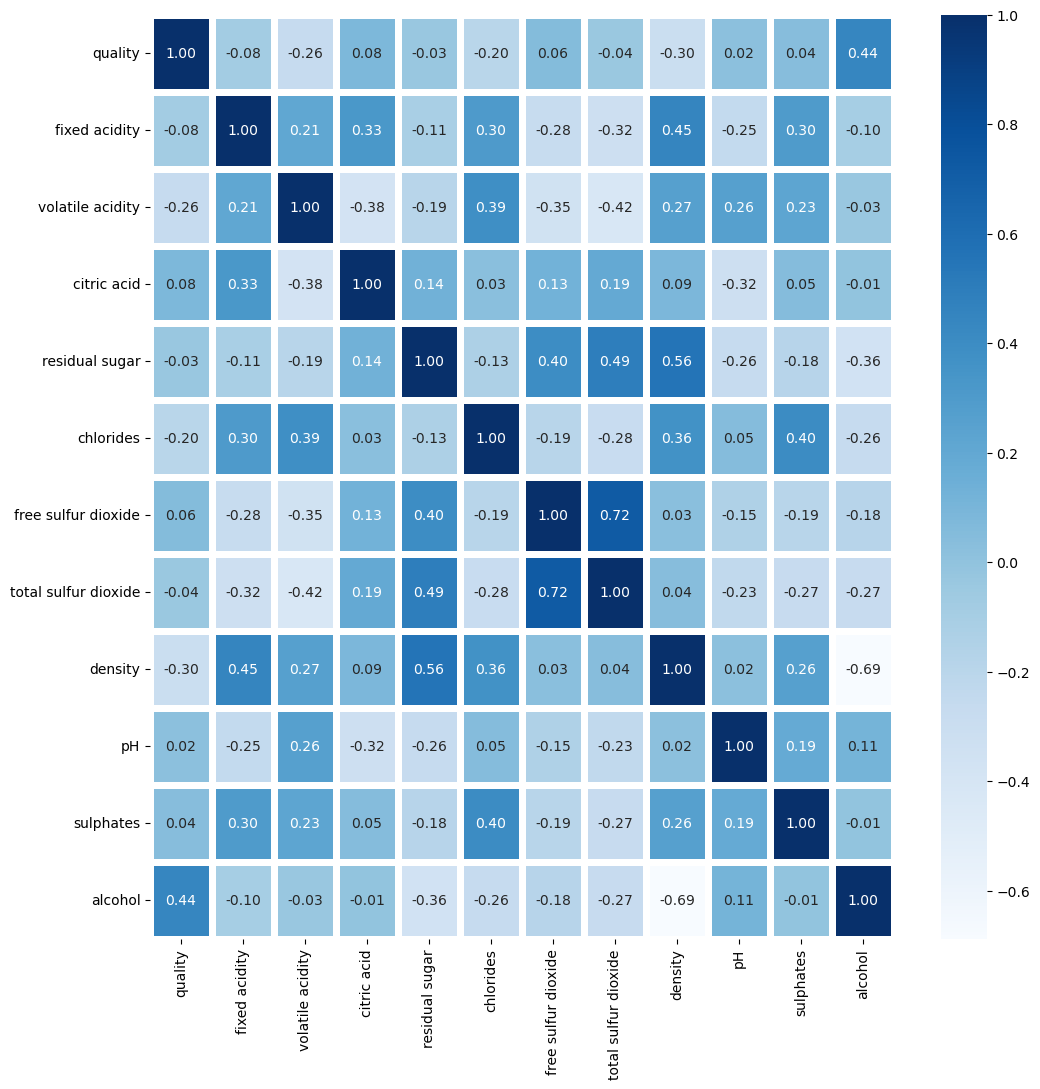

In [12]:
# train의 변수 간 상관관계 
plt.figure(figsize=(12, 12))
sns.heatmap(data = train.corr(), annot=True, fmt='.2f', linewidths=5, cmap="Blues")

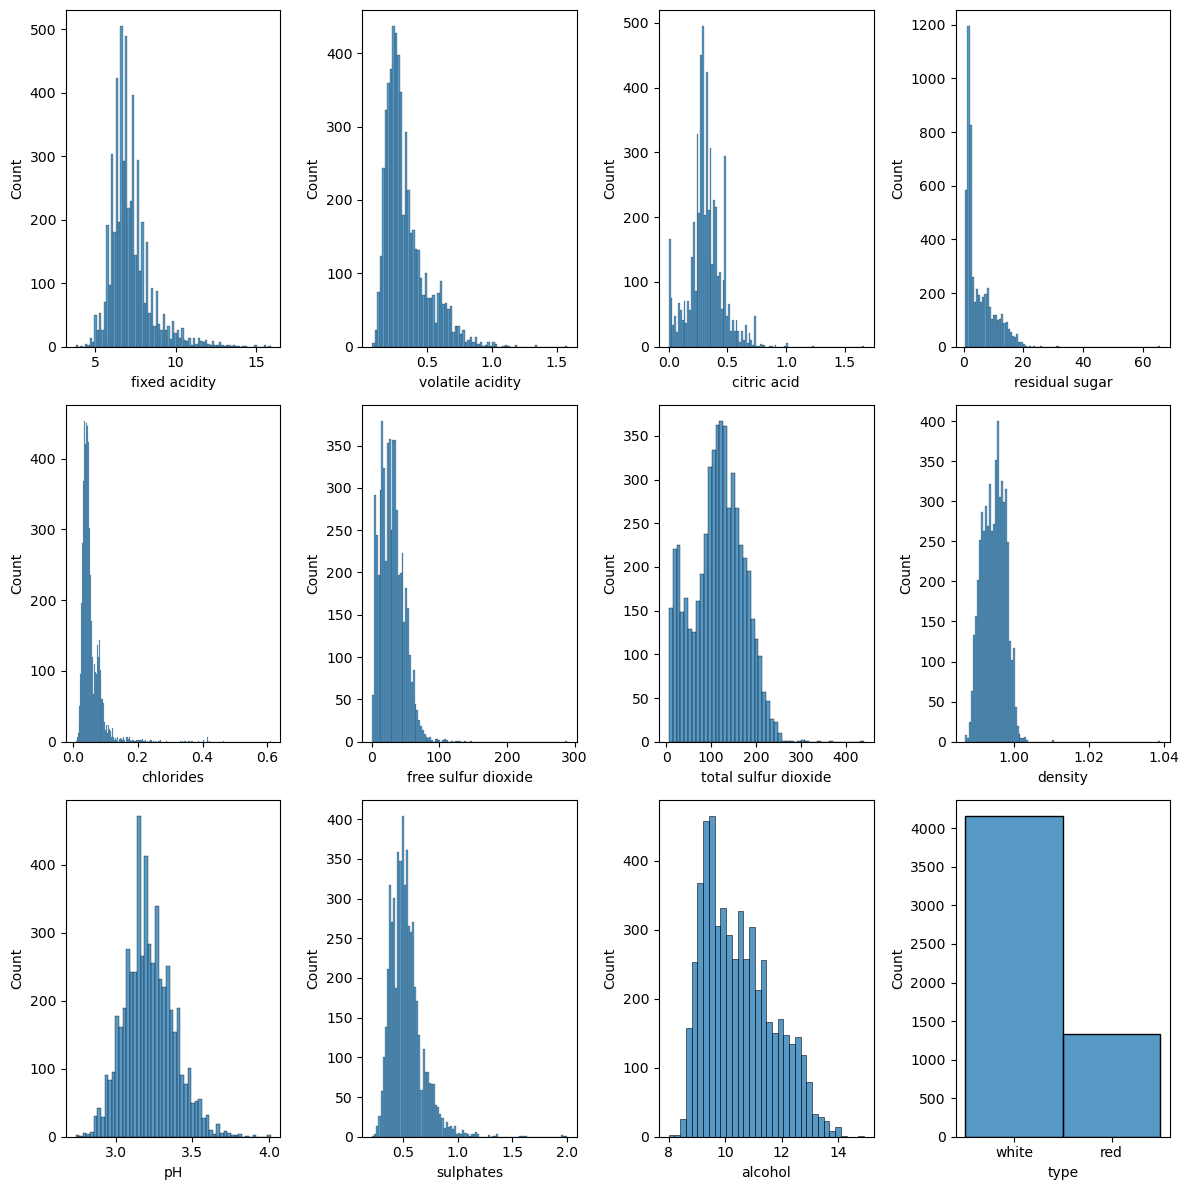

In [13]:
# train의 각 변수별 분포
plt.figure(figsize=(12, 12))
for i in range(1, 13):
    plt.subplot(3, 4, i)
    sns.histplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

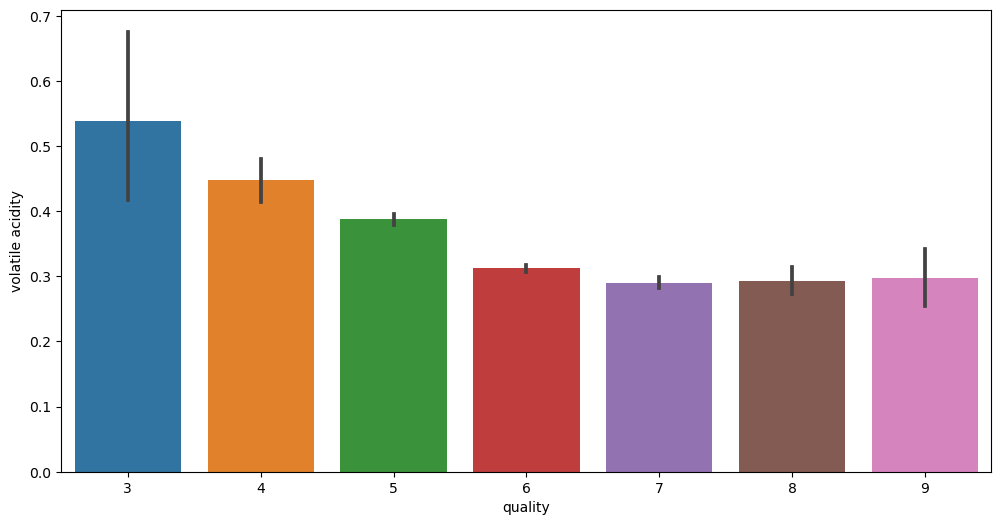

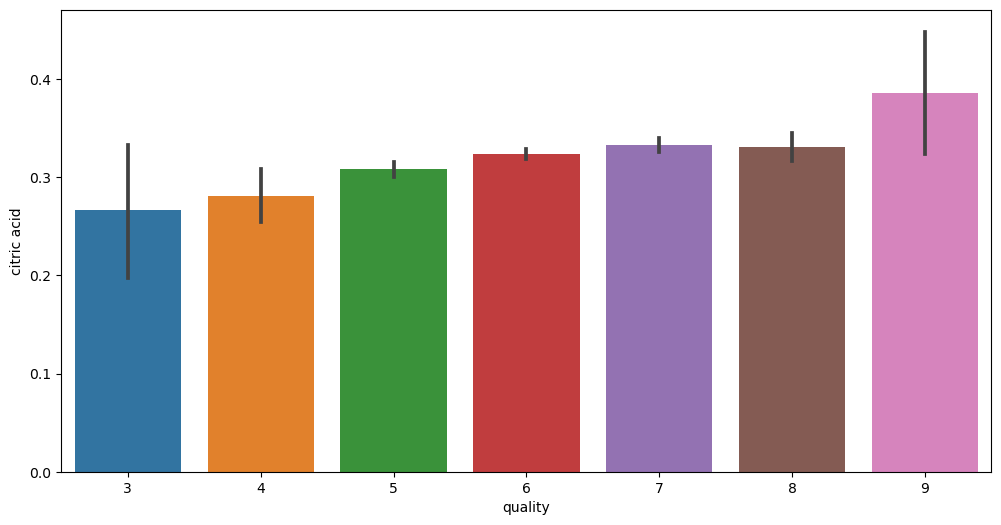

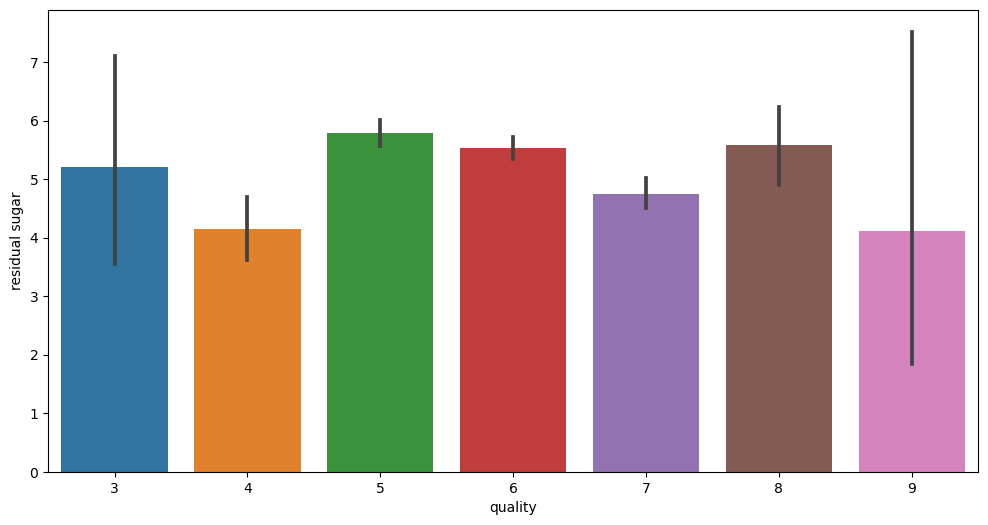

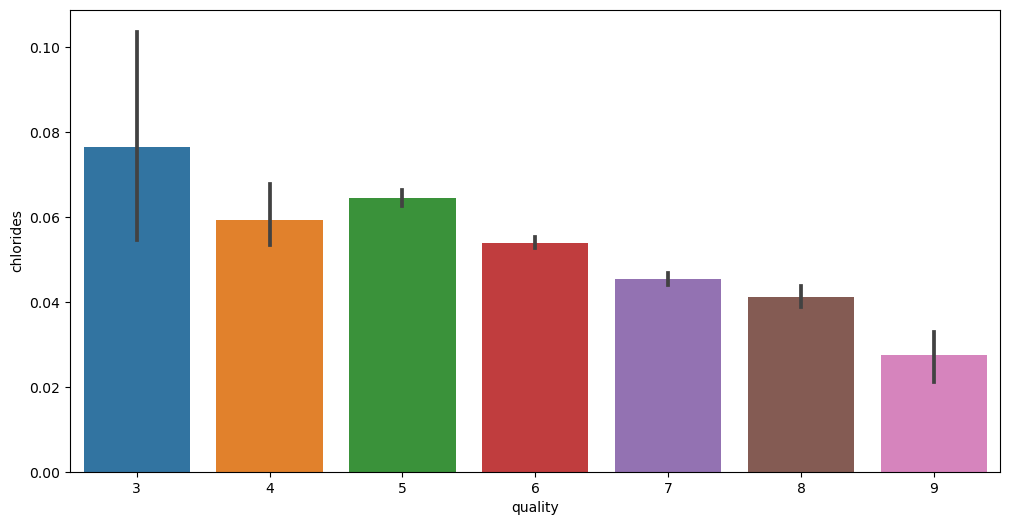

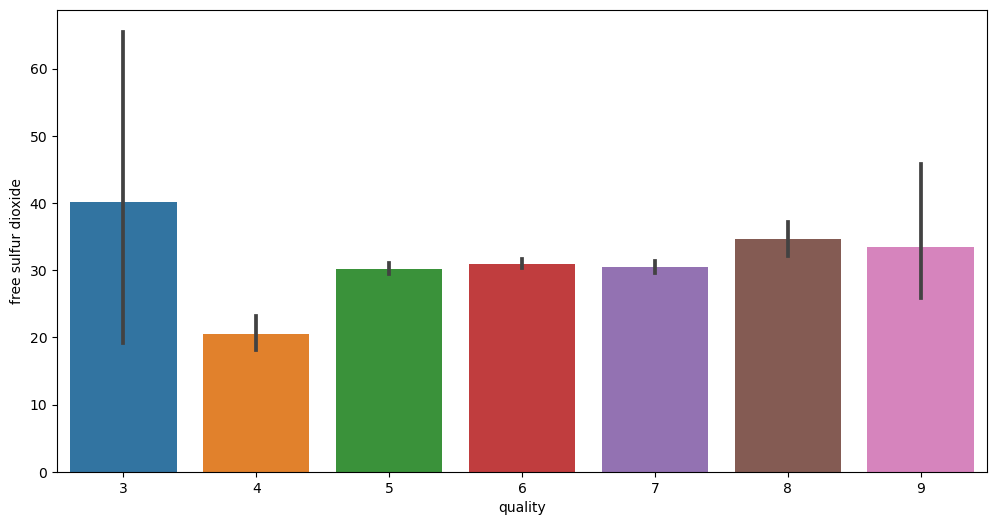

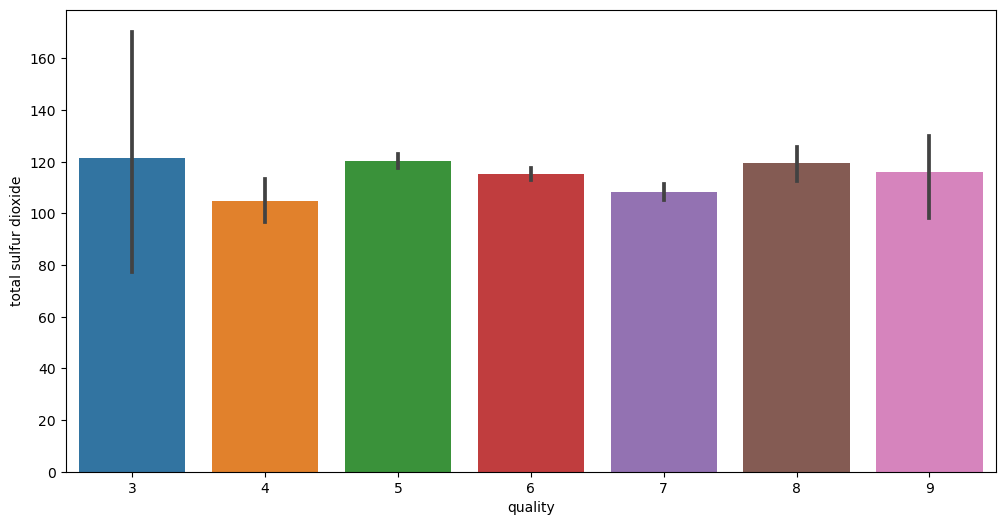

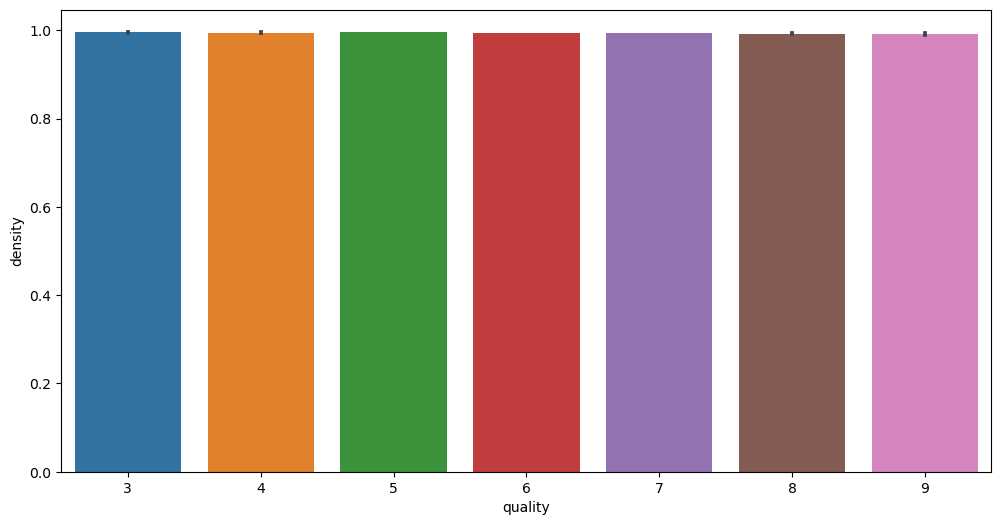

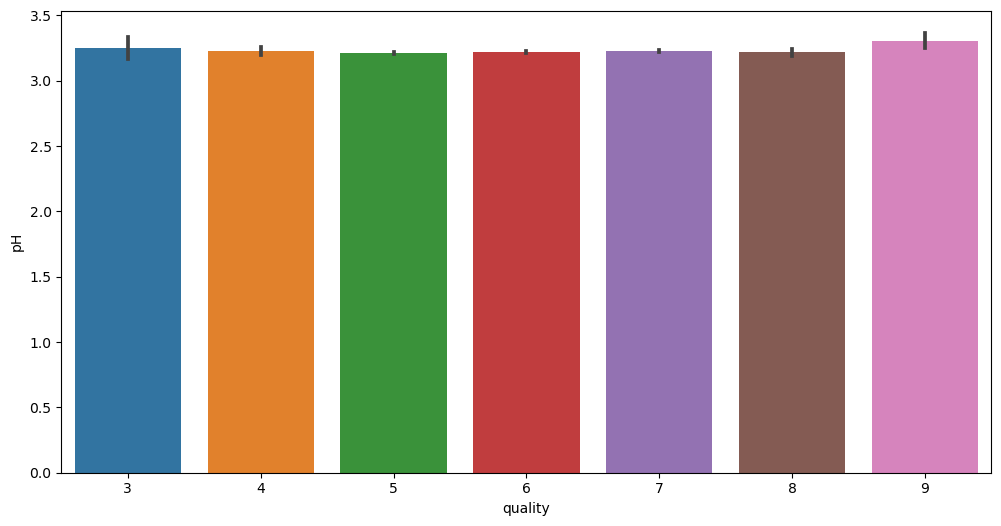

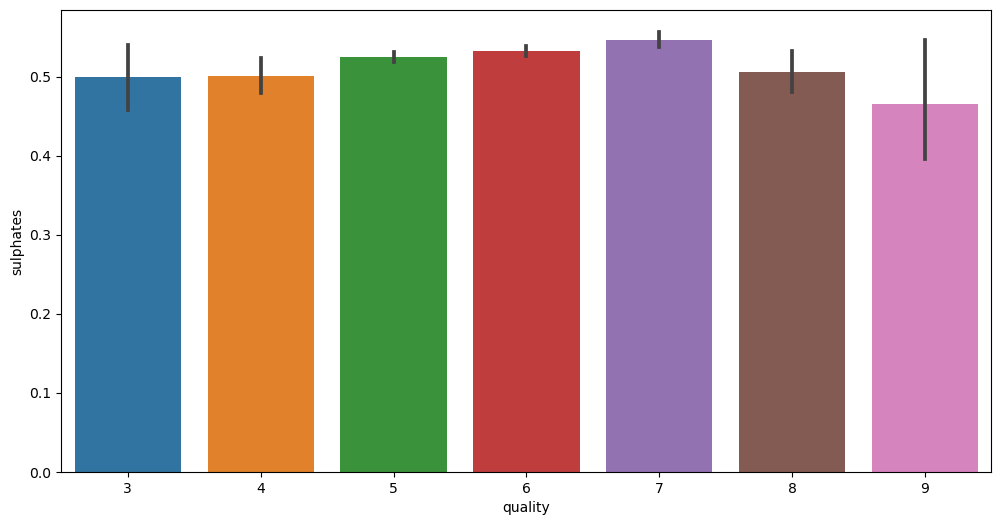

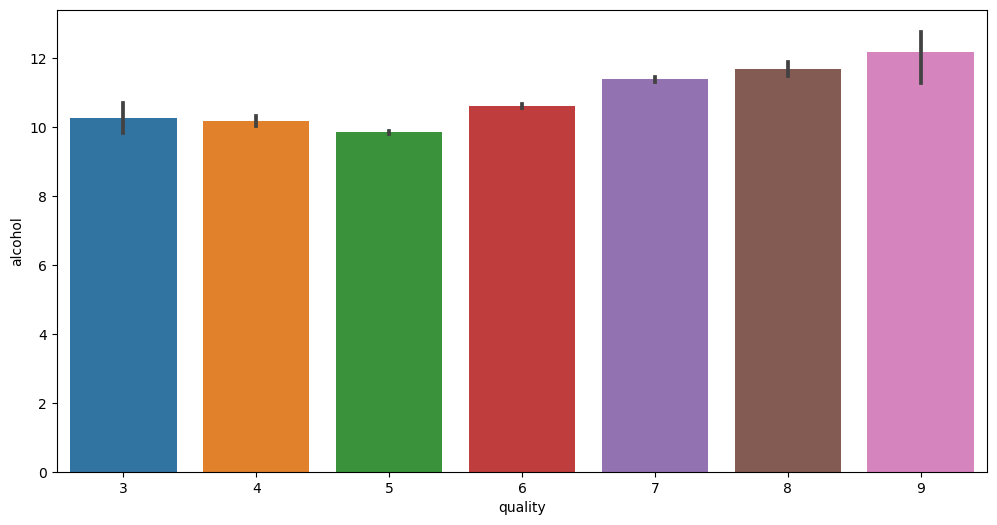

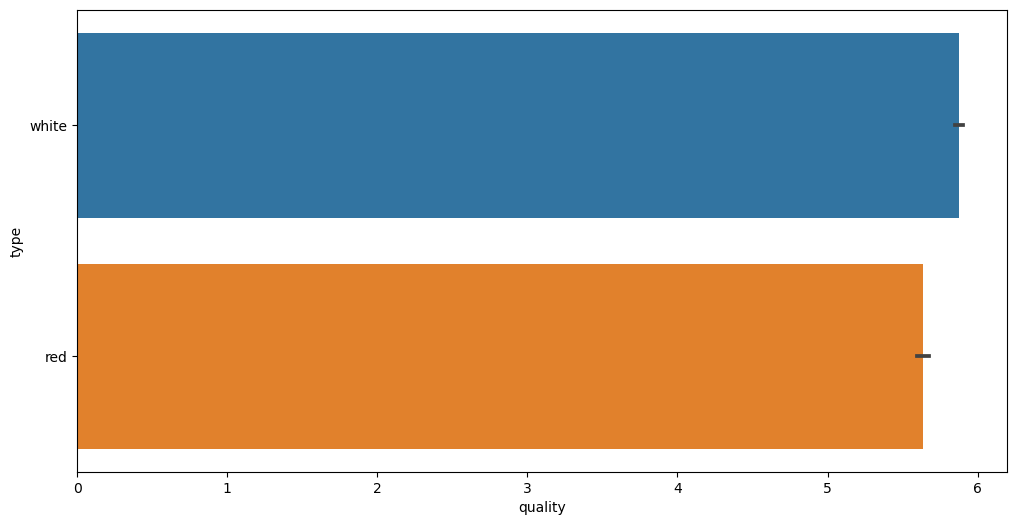

In [14]:
# train에서 각 변수와 quality 변수 사이의 분포
for i in range(11):
    fig = plt.figure(figsize=(12, 6))
    sns.barplot(x='quality', y = train.columns[i+2], data = train)

## 데이터 분할
- X, y 나누기

In [26]:
y = train['quality']
X = train.drop(columns = 'quality')

In [27]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               5.6             0.695         0.06             6.8      0.042   
1               8.8             0.610         0.14             2.4      0.067   
2               7.9             0.210         0.39             2.0      0.057   
3               7.0             0.210         0.31             6.0      0.046   
4               7.8             0.400         0.26             9.5      0.059   
...             ...               ...          ...             ...        ...   
5492            7.7             0.150         0.29             1.3      0.029   
5493            6.3             0.180         0.36             1.2      0.034   
5494            7.8             0.150         0.34             1.1      0.035   
5495            6.6             0.410         0.31             1.6      0.042   
5496            7.0             0.350         0.17             1.1      0.049   

      free sulfur dioxide  

In [29]:
# 범주형인 test 컬럼 onehot encoding 처리
category_column = ['type']
continuous_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

ohe = OneHotEncoder(sparse=False)
values = ohe.fit_transform(train[category_column])
X_ohe = np.concatenate([values, X[continuous_columns].values], axis = 1)

array([[ 0.  ,  1.  ,  5.6 , ...,  3.44,  0.44, 10.2 ],
       [ 1.  ,  0.  ,  8.8 , ...,  3.19,  0.59,  9.5 ],
       [ 0.  ,  1.  ,  7.9 , ...,  3.05,  0.52, 10.9 ],
       ...,
       [ 0.  ,  1.  ,  7.8 , ...,  3.07,  0.72, 11.3 ],
       [ 0.  ,  1.  ,  6.6 , ...,  3.13,  0.41, 10.5 ],
       [ 0.  ,  1.  ,  7.  , ...,  3.13,  0.36,  9.7 ]])

## 모델 학습

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_ohe, y, test_size = 0.2, stratify = y, random_state = 0)
print(X_train.shape, X_val.shape)

(4397, 13) (1100, 13)


In [34]:
tree = DecisionTreeClassifier(max_depth = 7 , random_state=0)
lr = LogisticRegression(max_iter = 10000, random_state = 0)

estimators = [
    ('DecisionTree', tree),
    ('LogisticRegression', lr)
]

for name, model in estimators:
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    train_acc = accuracy_score(y_train, pred_train)
    val_acc = accuracy_score(y_val, pred_val)
    print(f"{name}, train accuracy: {train_acc}")
    print(f"{name}, val accuracy: {val_acc}")
    print('='*50)

DecisionTree, train accuracy: 0.6245167159426882
DecisionTree, val accuracy: 0.519090909090909
LogisticRegression, train accuracy: 0.5483284057311804
LogisticRegression, val accuracy: 0.5381818181818182


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state=0)
params = {
    'max_depth' : range(2, 11),
    'max_leaf_nodes' : range(10, 31, 5), 
    'min_samples_leaf' : range(10, 210, 10),
    'max_features' : [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}
gs = GridSearchCV(tree, params, scoring = 'accuracy', cv = 4, n_jobs = -1)
gs.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(2, 11),
                         'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                         'max_leaf_nodes': range(10, 31, 5),
                         'min_samples_leaf': range(10, 210, 10)},
             scoring='accuracy')

In [38]:
gs.best_params_

{'max_depth': 4,
 'max_features': 0.9,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 40}

In [39]:
gs.best_score_

0.5544695591033171

### 성능이 잘 안나와서 onehotencoding이 아닌 label encoding으로 변환

In [42]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [43]:
train = train.drop(columns = 'index')

In [44]:
y = train['quality']
X = train.drop(columns = 'quality')

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['type'] = le.fit_transform(X['type'])

In [46]:
le.classes_

array(['red', 'white'], dtype=object)

In [47]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


In [49]:
X_train, X_val, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
print(X_train.shape, X_val.shape)

(4397, 12) (1100, 12)


In [52]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state=0)
params = {
    'max_depth' : range(2, 11),
    'max_leaf_nodes' : range(10, 31, 5), 
    'min_samples_leaf' : range(10, 210, 10),
    'max_features' : [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}
gs = GridSearchCV(tree, params, scoring = 'accuracy', cv = 4, n_jobs = -1)
gs.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(2, 11),
                         'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                         'max_leaf_nodes': range(10, 31, 5),
                         'min_samples_leaf': range(10, 210, 10)},
             scoring='accuracy')

In [53]:
gs.best_params_

{'max_depth': 8,
 'max_features': 0.9,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 20}

In [54]:
gs.best_score_

0.5515112912565142

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500,
                           max_depth = 5, 
                           n_jobs = -1, 
                           random_state = 0
                           )

In [58]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, n_jobs=-1, random_state=0)

In [59]:
pred_train = rfc.predict(X_train)
pred_val = rfc.predict(X_val)
train_acc = accuracy_score(y_train, pred_train)
val_acc = accuracy_score(y_val, pred_val)
print(f"{name}, train accuracy: {train_acc}")
print(f"{name}, val accuracy: {val_acc}")
print('='*50)

LogisticRegression, train accuracy: 0.5831248578576302
LogisticRegression, val accuracy: 0.54


## 성능이 안나오는 이유 고민
1. 데이터
    - 이상치 
2. 스케일링
3. 범주형 인코딩(onehot, label)

### 이상치 체크

In [66]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.shape

(5497, 14)

In [64]:
train = train.drop(columns = 'index')

y = train['quality']
X = train.drop(columns = 'quality')

X_numeric = X.select_dtypes(exclude='object')
X_numeric

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9
...,...,...,...,...,...,...,...,...,...,...,...
5492,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1
5493,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0
5494,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3
5495,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5


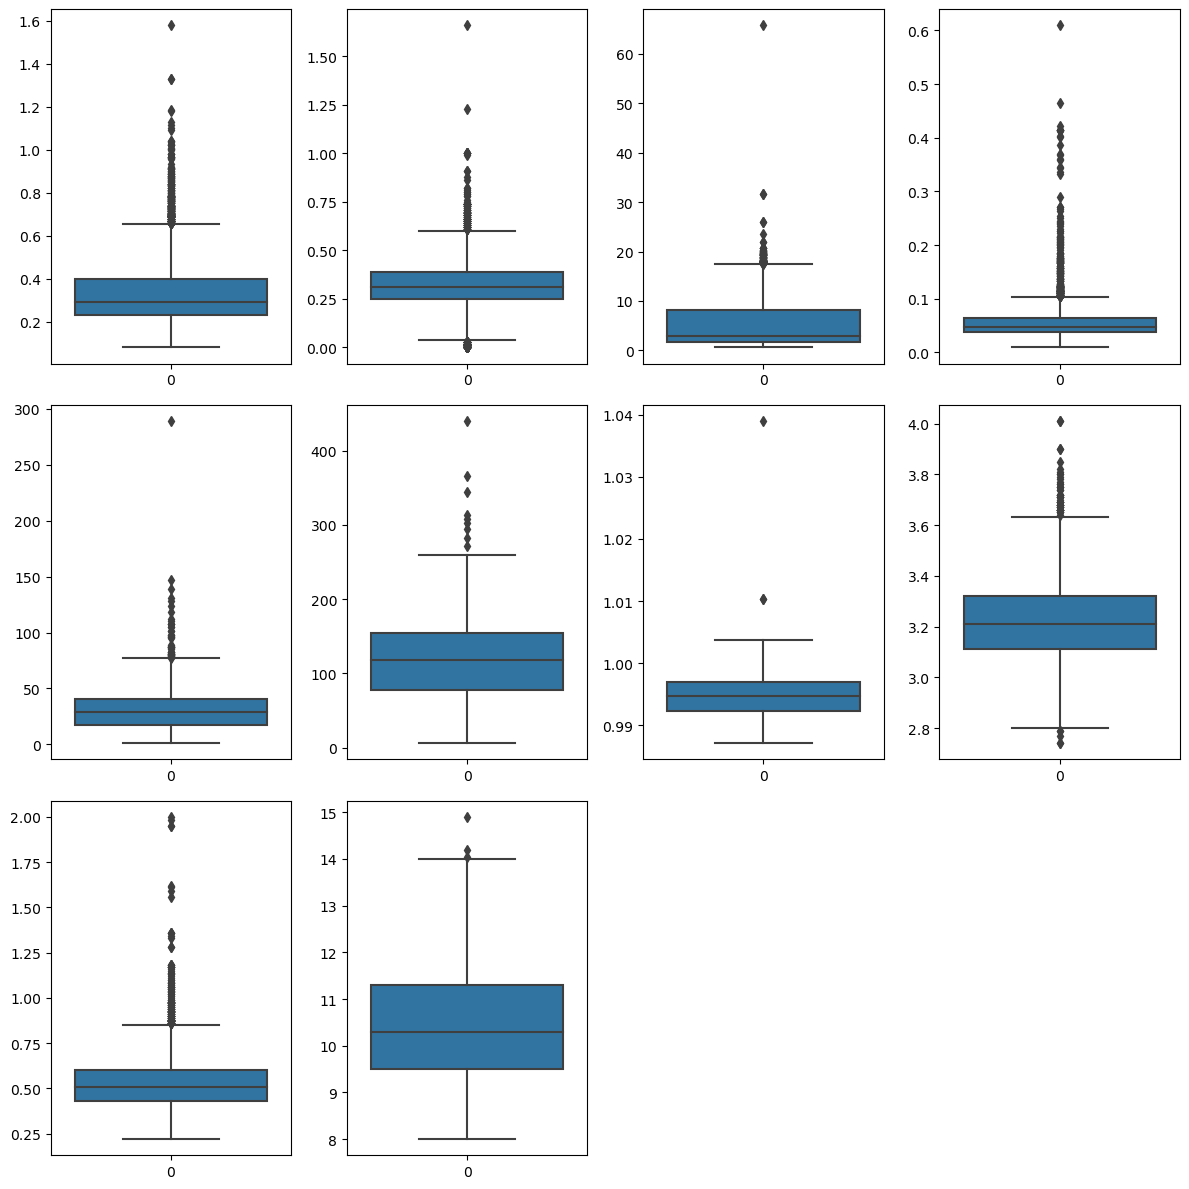

In [90]:
plt.figure(figsize=(12, 12))
for i in range(1, 11):
    plt.subplot(3, 4, i)
    sns.boxplot(data = X_numeric.iloc[:,i])
plt.tight_layout()
plt.show()

### 데이터의 양이 부족해 이상치를 모두 지우는 것은 아닌것 같음

## 이상치를 포함해 스케일링 실행

In [94]:
ss = StandardScaler()
le = LabelEncoder()
numeric_columns = X.select_dtypes(exclude = 'object').columns.tolist()

# 스케일링
X[numeric_columns] = ss.fit_transform(X[numeric_columns])

X['type'] = le.fit_transform(X['type'])

In [95]:
X_train, X_val, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
print(X_train.shape, X_val.shape)

(4397, 12) (1100, 12)


In [96]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state=0)
params = {
    'max_depth' : range(2, 11),
    'max_leaf_nodes' : range(10, 31, 5), 
    'min_samples_leaf' : range(10, 210, 10),
    'max_features' : [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}
gs = GridSearchCV(tree, params, scoring = 'accuracy', cv = 4, n_jobs = -1)
gs.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(2, 11),
                         'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                         'max_leaf_nodes': range(10, 31, 5),
                         'min_samples_leaf': range(10, 210, 10)},
             scoring='accuracy')

In [97]:
gs.best_params_

{'max_depth': 8,
 'max_features': 0.9,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 20}

In [98]:
gs.best_score_

0.551056332202829